In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# 20년말고 1년으로 하면?

In [3]:
!pip install finance-datareader

In [4]:
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime
import FinanceDataReader as fdr

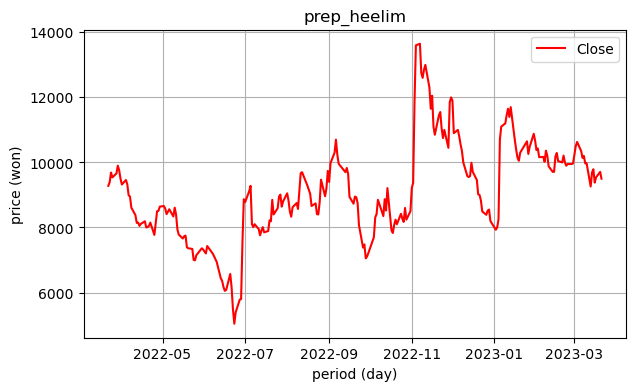

In [5]:
# 현재 시간으로부터 20년 전 날짜 계산
# start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)
start_date = datetime.datetime.now() - datetime.timedelta(days=365)


df_heelim = fdr.DataReader('037440', start_date)

plt.figure(figsize=(7,4))

plt.title('prep_heelim')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(df_heelim['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

In [6]:
df_heelim = df_heelim.drop(labels='Change', axis=1)

In [7]:
df_heelim.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-22,9270,9380,9180,9280,1251643
2022-03-23,9300,9450,9150,9390,1442015
2022-03-24,9290,9840,9210,9690,3162077
2022-03-25,9650,9750,9450,9540,1183719
2022-03-28,9660,9990,9620,9660,2549700
2022-03-29,9760,10300,9700,9900,4572347
2022-03-30,10000,10250,9650,9760,1882208
2022-03-31,9700,9800,9480,9500,731068
2022-04-01,9330,9530,9290,9320,636419


In [8]:
df_heelim = df_heelim[['Open', 'High', 'Low', 'Volume', 'Close']]

In [9]:
df_heelim.head(5)

,Open,High,Low,Volume,Close
Date,,,,,
2022-03-22,9270,9380,9180,1251643,9280
2022-03-23,9300,9450,9150,1442015,9390
2022-03-24,9290,9840,9210,3162077,9690
2022-03-25,9650,9750,9450,1183719,9540
2022-03-28,9660,9990,9620,2549700,9660


In [10]:
df = df_heelim

seq_length = 7
batch = 100

# 데이터를 역순으로 정렬하여 전체 데이터의 70% 학습, 30% 테스트에 사용
# df = df[::-1]
train_size = int(len(df) * 0.7)
train_set = df[0:train_size]
test_set = df[train_size - seq_length:]

In [11]:
print(train_set.head(5))
print(test_set.head(5))
print(type(train_set))
print(train_set.shape)

            Open  High   Low   Volume  Close
Date                                        
2022-03-22  9270  9380  9180  1251643   9280
2022-03-23  9300  9450  9150  1442015   9390
2022-03-24  9290  9840  9210  3162077   9690
2022-03-25  9650  9750  9450  1183719   9540
2022-03-28  9660  9990  9620  2549700   9660
             Open   High    Low   Volume  Close
Date                                           
2022-11-22  11200  11650  10900  1302046  11550
2022-11-23  11600  11650  11000   793333  11050
2022-11-24  11050  11200  10700   706340  10750
2022-11-25  11050  11750  11000  2461047  11000
2022-11-28  10950  11200  10450   715602  10450
<class 'pandas.core.frame.DataFrame'>
(174, 5)


In [12]:
# input scale
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

# output scale
scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])

train_set.iloc[:, -1] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, -1] = scaler_y.transform(test_set.iloc[:, [-1]])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [13]:
print(train_set.head(5))
print(test_set.head(5))
print(type(train_set))
print(train_set.shape)

                Open      High       Low    Volume     Close
Date                                                        
2022-03-22  0.498262  0.414973  0.508454  0.032803  0.492451
2022-03-23  0.501738  0.422460  0.504831  0.038289  0.505226
2022-03-24  0.500579  0.464171  0.512077  0.087861  0.540070
2022-03-25  0.542294  0.454545  0.541063  0.030845  0.522648
2022-03-28  0.543453  0.480214  0.561594  0.070212  0.536585
                Open      High       Low    Volume     Close
Date                                                        
2022-11-22  0.721900  0.657754  0.716184  0.034255  0.756098
2022-11-23  0.768250  0.657754  0.728261  0.019595  0.698026
2022-11-24  0.704519  0.609626  0.692029  0.017087  0.663182
2022-11-25  0.704519  0.668449  0.728261  0.067657  0.692218
2022-11-28  0.692932  0.609626  0.661836  0.017354  0.628339
<class 'pandas.core.frame.DataFrame'>
(174, 5)


In [14]:
train_set.head(10)

,Open,High,Low,Volume,Close
Date,,,,,
2022-03-22,0.498262,0.414973,0.508454,0.032803,0.492451
2022-03-23,0.501738,0.422460,0.504831,0.038289,0.505226
2022-03-24,0.500579,0.464171,0.512077,0.087861,0.540070
2022-03-25,0.542294,0.454545,0.541063,0.030845,0.522648
2022-03-28,0.543453,0.480214,0.561594,0.070212,0.536585
2022-03-29,0.555041,0.513369,0.571256,0.128504,0.564460
2022-03-30,0.582851,0.508021,0.565217,0.050975,0.548200
2022-03-31,0.548088,0.459893,0.544686,0.017800,0.518002
2022-04-01,0.505214,0.431016,0.521739,0.015072,0.497096


In [15]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        #print(_x, "-->", _y)
        dataX.append(_x)
        dataY.append(_y)
    
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(np.array(train_set), seq_length)
testX, testY = build_dataset(np.array(test_set), seq_length)

# 텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

dataset = TensorDataset(trainX_tensor, trainY_tensor)

dataloader = DataLoader(dataset, batch_size = batch, shuffle = True, drop_last = True)

In [16]:
import torch.nn as nn

data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
nb_epochs = 100

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.layers = layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers = layers,
                           #dropout = 0.1,
                           batch_first = True)
        self.fc = nn.Linear(hidden_dim, output_dim, bias = True)
    
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.layers, self.seq_len, self.hidden_dim),
            torch.zeros(self.layers, self.seq_len, self.hidden_dim))
        
    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        return x

In [17]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_model(model, train_df, num_epochs = None, lr = None, verbose = 10, patience = 10):
    criterion = nn.MSELoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)
    nb_epochs = num_epochs
    
    train_hist = np.zeros(nb_epochs)
    
    for epoch in range(nb_epochs):
        avg_cost = 0
        total_batch = len(train_df)
        
        for batch_idx, samples in enumerate(train_df):
            x_train, y_train = samples
            
            # seq별 hidden state reset
            model.reset_hidden_state()
            
            # H(x) 계산
            outputs = model(x_train)
            
            # cost 계산
            loss = criterion(outputs, y_train)
            
            # cost로 H(x) 개선
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            avg_cost += loss / total_batch
        
        train_hist[epoch] = avg_cost
        
        if epoch % verbose == 0:
            print('Epoch:', '%04d' % (epoch), 'train loss :', '{:.4f}'.format(avg_cost))
        
        if (epoch % patience == 0) & (epoch != 0):
            if train_hist[epoch - patience] < train_hist[epoch]:
                print('\n Early Stopping')
                break
                
    return model.eval(), train_hist

In [18]:
net = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model, train_hist = train_model(net, dataloader, num_epochs = nb_epochs, lr = learning_rate, verbose = 20, patience = 10)

Epoch: 0000 train loss : 0.6311
Epoch: 0020 train loss : 0.0471
Epoch: 0040 train loss : 0.0249

 Early Stopping


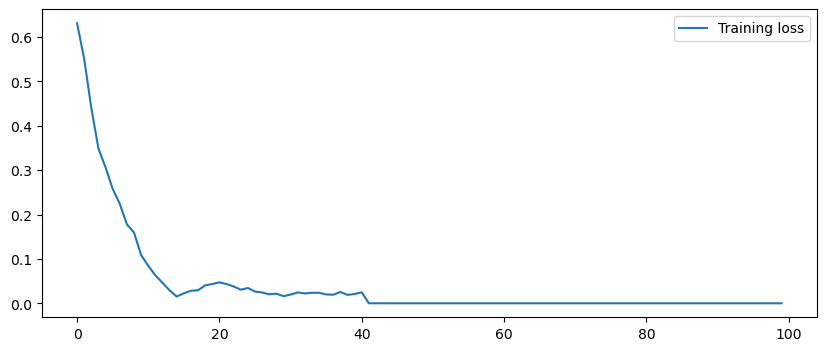

In [19]:
# epoch별 손실값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_hist, label = "Training loss")
plt.legend()
plt.show()

In [20]:
# 예측 테스트
with torch.no_grad():
    pred = []
    for pr in range(len(testX_tensor)):
        
        model.reset_hidden_state()
        
        predicted = model(torch.unsqueeze(testX_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(predicted)
        
    # INVERSE
    pred_inverse = scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse = scaler_y.inverse_transform(testY_tensor)
    
def MAE(true, pred):
    return np.mean(np.abs(true - pred))

print('MAE SCORE : ', MAE(pred_inverse, testY_inverse))

MAE SCORE :  1269.0082277059555


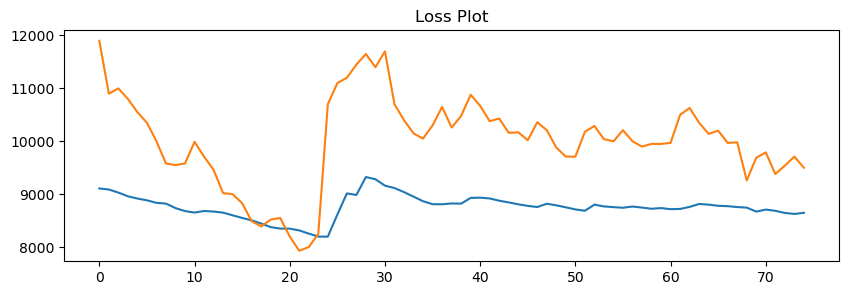

In [24]:
fig = plt.figure(figsize = (10, 3))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label = 'pred')
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label = 'true')
plt.title('Loss Plot')
plt.show()

            Open  High  Low  Close  Volume
2012-04-07    10    20    0     20     100
2012-04-08    20    30   10     30     200
2012-04-09    30    40   20     40     300
2012-04-10    40    50   30     50     400
2012-04-11    50    60   40     60     500
            Open  High   Low   Volume  Close
Date                                        
2022-03-22  9270  9380  9180  1251643   9280
2022-03-23  9300  9450  9150  1442015   9390
2022-03-24  9290  9840  9210  3162077   9690
2022-03-25  9650  9750  9450  1183719   9540
2022-03-28  9660  9990  9620  2549700   9660
             Open   High    Low   Volume  Close
Date                                           
2022-11-22  11200  11650  10900  1302046  11550
2022-11-23  11600  11650  11000   793333  11050
2022-11-24  11050  11200  10700   706340  10750
2022-11-25  11050  11750  11000  2461047  11000
2022-11-28  10950  11200  10450   715602  10450


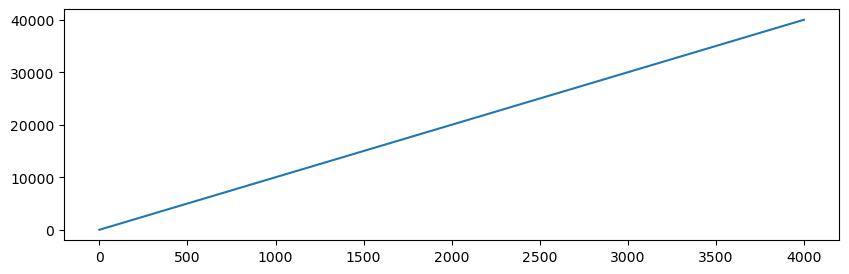

In [34]:
### Verify model

from datetime import date

st_open = []
st_high = []
st_low = []
st_close = []
st_volume = []
st_date = []

time_before = 4000

today = date.today() - datetime.timedelta(days = time_before)

for i in range(1, time_before + 1):
    price = i * 10
    st_open.append(price)
    st_high.append(price + 10)
    st_low.append(price - 10)
    st_close.append(price + 10)
    st_volume.append(i * 100)
    st_date.append(today)
    
    today += datetime.timedelta(days = 1)

df_stock = pd.DataFrame({'Open': st_open, 'High' : st_high, 'Low' : st_low, 'Close' : st_close, 'Volume' : st_volume}, index = st_date)

seq_length = 7
batch = 100

# 데이터를 역순으로 정렬하여 전체 데이터의 70% 학습, 30% 테스트에 사용
# df = df[::-1]
train_size = int(len(df) * 0.7)
train_set = df[0:train_size]
test_set = df[train_size - seq_length:]

print(df_stock.head(5))
print(train_set.head(5))
print(test_set.head(5))

fig = plt.figure(figsize = (10, 3))
# plt.plot(np.arange(len(df_stock['Open'])), df_stock['Open'], label = 'open')
# plt.plot(np.arange(len(df_stock['High'])), df_stock['High'], label = 'high')
# plt.plot(np.arange(len(df_stock['Low'])), df_stock['Low'], label = 'low')
plt.plot(np.arange(len(df_stock['Close'])), df_stock['Close'], label = 'close')
# plt.plot(np.arange(len(df_stock['Volume'])), df_stock['Volume'], label = 'volume')